In [9]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import numpy as np
import os

def readStats(path: str):
    x = []
    y = []
    with open(path, "r") as f:
        line = f.readline()
        while line: 
            tmp =[int(x) for x in line.split(" ")]
            x.append(tmp[0])
            y.append(tmp[1])
            line = f.readline()
    return processing(x,y)

def processing(x,y):
    sizes = list(set(x))
    sizes.sort()
    times = []
    for size in sizes: 
        time = []
        for i in range(0, len(x)):
            if x[i] == size:
                time.append(y[i])
        times.append(time)
    return (sizes, times)

def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()

def get_intervals(sizes, times):
    gamma = 0.95
    intervals = []
    for time in times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return (sizes,intervals)

x = []
y = []
x, y = readStats("C:\\parallel_prog\\lab_2\\files\\result\\result_1.txt")
x.sort()
y.sort()

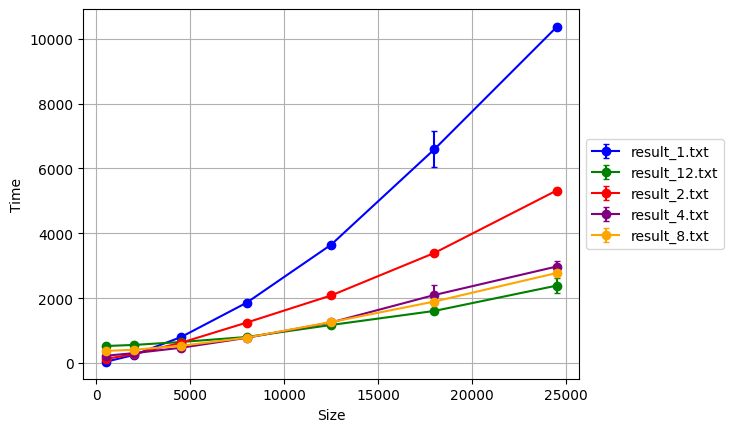

In [10]:
import os
import matplotlib.pyplot as plt

path = "C:\\parallel_prog\\lab_2\\files\\result"

fig = plt.figure()

# Define a color palette
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, file in enumerate(os.listdir(path)):
    sizes, intervals = get_intervals(*readStats(os.path.join(path, file)))
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]
    
    # Use different color for each plot
    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=2, label=file, color=colors[i % len(colors)])

plt.xlabel('Size')
plt.ylabel('Time')
plt.grid(True)

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
